<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        PROJECT 7 - K-means
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Scientific Programming</b> <br>  <b>AY 2021/2022</b> <br>
    Emanuele Cavalleri<br>(matriculation number: <b>995883</b>)<br>
    <a href="mailto:emanuele.cavalleri@mail.polimi.it">emanuele.cavalleri@mail.polimi.it</a><br>
    <a href="https://github.com/emanuelecavalleri/K-means">GitHub link for this project</a><br>
    </div>
</tr>
</table>

**Short description**: kmeans is one of the most popular clustering algorithms for vectors. Starting from a number of clusters, generates a random clustering of the objects: then applies iteratively two steps, namely assignment and update until convergence, to identify a proper clustering.

**Expected outcome**: Implement a python script that:
1. Takes as input:
    <ol>
         <li>A number of clusters</li>
         <li>A CSV file, where each line of the file correspond to a point (vector) in the space</li>
    </ol>
2. Implements a version of kmeans based on lists (thus, each line of the CSV is translated in a list)
3. Implements a version of kmeans based on numpy vectors (thus, each line of the CSV is translated in a numpy vector)
4. Test the two implementations providing charts and visual representations that show, depending on the size of the vectors, the number of the vectors and the number of clusters, how the performance changes.

<img src="https://miro.medium.com/max/1200/1*TmvsQ4XaOxeb-TmKk1qgOw.png" alt=""> 

1. Take as input:
    <ol>
         <li>A number of clusters</li>
         <li>A CSV file, where each line of the file correspond to a point (vector) in the space</li>
    </ol>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Test dataset: 10,000 samples/rows, 3 dimensions, 5 "real" clusters
data = make_blobs(n_samples=10000, n_features=3, centers=5, random_state=42)

k = 5 # Number of clusters

# Save onto a CSV
np.savetxt("data.csv", data[0], delimiter=",")

# Simulating CSV user's input
df = pd.read_csv('data.csv', sep = ',', header=None, names=["x","y","z"])
# data[1] is the array of labels
df['label'] = data[1]
df

,x,y,z,label
0,1.629976,-8.685850,-8.198777,1
1,4.986461,-8.627624,7.409564,3
2,-7.740665,5.857463,3.265846,2
3,0.384800,-6.157600,-8.517338,1
4,-1.808461,8.735895,5.273240,0
...,...,...,...,...
9995,7.055912,-4.768579,-4.606590,4
9996,6.363859,-5.151740,-7.377719,4
9997,6.357837,-5.674293,-5.843819,4
9998,5.542797,-7.196482,7.847077,3


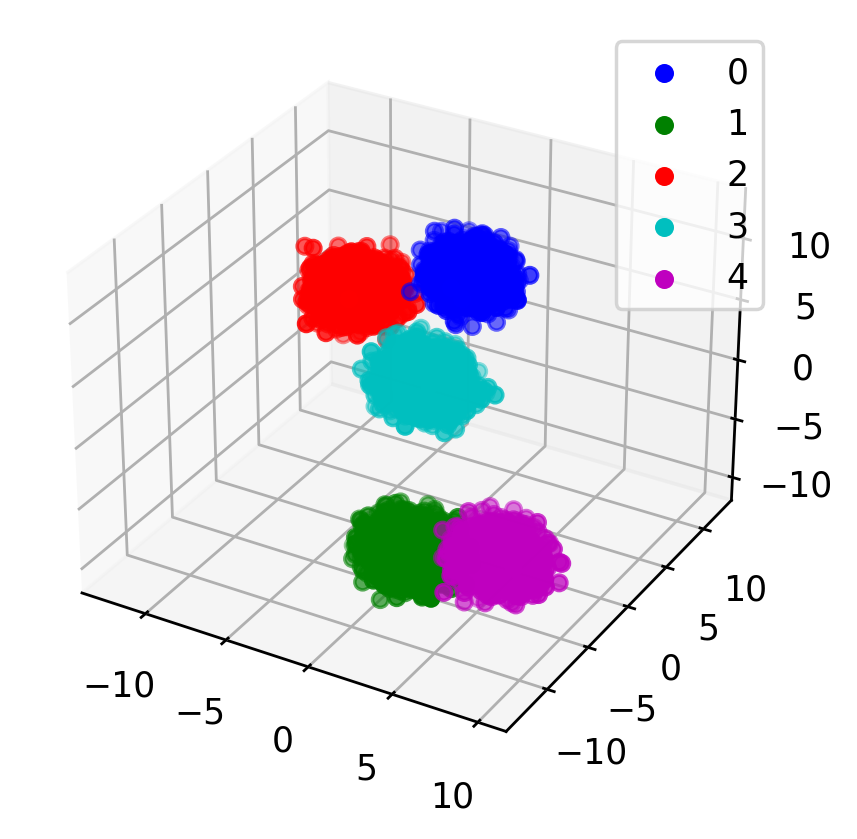

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcl

# Visualizing the test dataset with "real" clusters
cluster = df['label']
fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')
colors = list(mcl.BASE_COLORS.keys())

for i in range(k):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

2. Implements a version of kmeans based on lists (thus, each line of the CSV is translated in a list)

In [3]:
data = df.drop('label', axis=1).values.tolist()
data[:5] # First five lists

[[1.6299756356763109, -8.685850406491166, -8.198776821304605],
 [4.986461030686848, -8.627623883392305, 7.4095638136576785],
 [-7.740664945039409, 5.857463245100432, 3.265845835961983],
 [0.38480043569014966, -6.1576002327948265, -8.517337500200009],
 [-1.8084613379198529, 8.735894957387343, 5.273240151071754]]

In [4]:
from collections import defaultdict
from math import sqrt
import random
random.seed(4000)

def square(list):
    return map(lambda element : element ** 2, list)

# Euclidean distance between 2 lists
def dist_list(list1,list2):
    diff = [element_list1 - element_list2 for element_list1, element_list2 in zip(list1, list2)]
    return sqrt(sum(square(diff)))

# Euclidean distance between 2 numpy arrays
def dist_np(np_array1, np_array2):
    return np.sqrt(((np_array1 - np_array2) ** 2).sum())

def list_kmeans(k, data, number_of_iteration, threshold):
    
    # Randomly pick k data points as our initial centroids
    centroids = random.sample(data, k)
    centroid_update = [] # Keep centroid of each iteration
    count = 0
    
    while count < number_of_iteration:
        count += 1
        
        # Dict to assign the cluster to each data point
        centroid_dict = defaultdict(list)
        for point in data:
            min_dist = float('inf') # Initialize minimum distance to infinite
            temp = None
            
            for centroid in centroids:
                # Finding the distance between centroids and all the data points
                d = dist_list(centroid, point)
                if d < min_dist:
                    # Closest centroid for this point 
                    min_dist = d
                    temp = centroid
                    
            # Assigning the datapoint to the closest cluster
            centroid_dict[str(temp)].append(point)
        
        centroids = [] # List of centroids
        for centroid in centroid_dict:
            # Updating centroids by taking mean of cluster it belongs to
            centroids.append(np.array(centroid_dict[centroid]).mean(axis=0))
        
        centroid_update.append(np.array(centroids))
        
        # Checking for convergence of centroid
        if len(centroid_update) > 1 and dist_np(centroid_update[-1], centroid_update[-2]) < threshold:
            return centroids, count
        
    return centroids, count

In [5]:
import time

NUMBER_OF_ITERATION = 1000
THRESHOLD = 10**-4

starttime=time.time()
(mu, list_iterations) = list_kmeans(k, data, NUMBER_OF_ITERATION, THRESHOLD)
list_stopwatch = time.time() - starttime
print(f"List-based K-means' time: {list_stopwatch}")
print(f'\nThe centroids of the K = {k} clusters are {mu}')
print(f'\nNumber of iterations = {list_iterations}')

List-based K-means' time: 2.6425139904022217

The centroids of the K = 5 clusters are [array([ 1.94480743, -6.91225051, -6.87296099]), array([ 4.16063297, -9.57859636,  9.40797231]), array([-8.80226214,  7.31350708,  2.05749686]), array([-2.49422074,  8.95062726,  4.64782837]), array([ 6.62481509, -5.72486027, -6.35085893])]

Number of iterations = 4


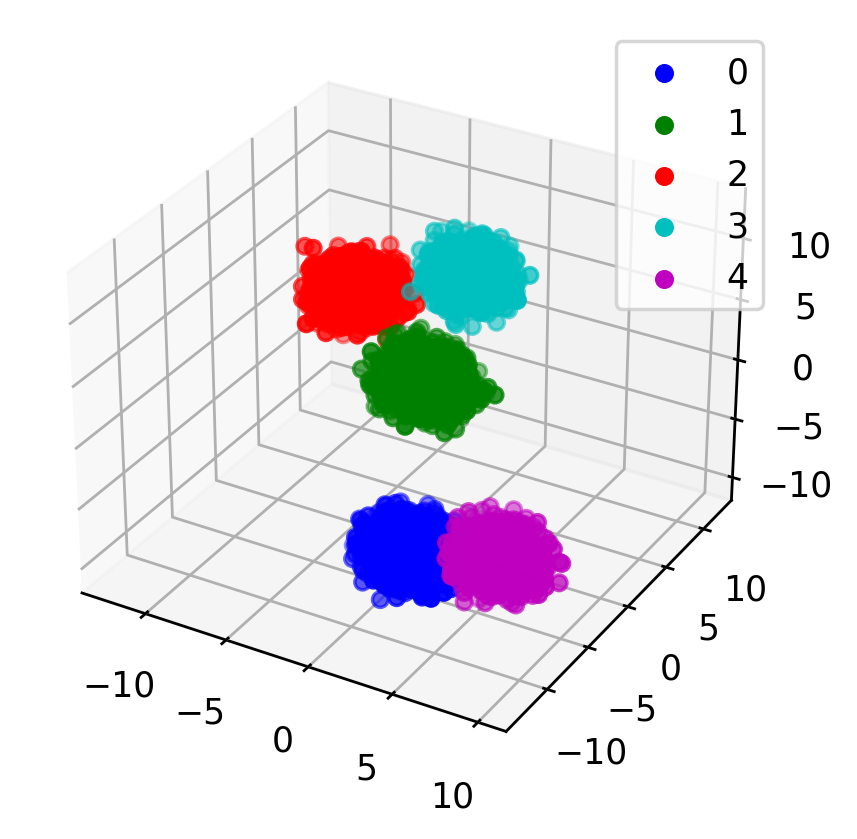

In [6]:
# Assign clusters
def assign(points,mu):
    min_dist = float('inf')
    for i, point in enumerate(mu):
        if dist_np(np.array(point),points) < min_dist:
            min_dist = dist_np(np.array(point),points)
            cluster = i
    return cluster

# Visualizing the dataset based on the clusters that we created using k-means clustering algorithm
cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)
fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

for i in range(k):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

3. Implements a version of kmeans based on numpy vectors (thus, each line of the CSV is translated in a numpy vector)

In [7]:
np.random.seed(98765432)

def npkmeans(k, data, number_of_iteration, threshold):
    
    # Randomly pick k data points as our initial centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    centroid_update = [] # Keep centroid of each iteration
    count = 0
    
    while count < number_of_iteration:
        count += 1
        
        # Dict to assign the cluster to each data point
        centroid_dict = defaultdict(list)
        for point in data:
            min_dist = float('inf') # Initialize minimum distance to infinite
            temp = None
            
            for centroid in centroids:
                # Finding the distance between centroids and all the data points
                d = dist_np(np.array(centroid), point)
                
                if d < min_dist:
                    # Closest centroid for this point 
                    min_dist = d
                    temp = centroid
                    
            # Assigning the datapoint to the closest cluster
            centroid_dict[str(temp)].append(point)
        
        centroids = [] # List of centroids
        for centroid in centroid_dict:
            # Updating centroids by taking mean of cluster it belongs to
            centroids.append(np.array(centroid_dict[centroid]).mean(axis=0))
            
        centroid_update.append(np.array(centroids))
        
        # Checking for convergence of centroid
        if len(centroid_update) > 1 and dist_np(centroid_update[-1], centroid_update[-2]) < threshold:
            return centroids, count
        
    return centroids, count

npArray-based K-means' time: 4.179088115692139

The centroids of the K = 5 clusters are [array([ 1.94480743, -6.91225051, -6.87296099]), array([ 4.16063297, -9.57859636,  9.40797231]), array([-8.80226214,  7.31350708,  2.05749686]), array([-2.49422074,  8.95062726,  4.64782837]), array([ 6.62481509, -5.72486027, -6.35085893])]

Number of iterations = 4


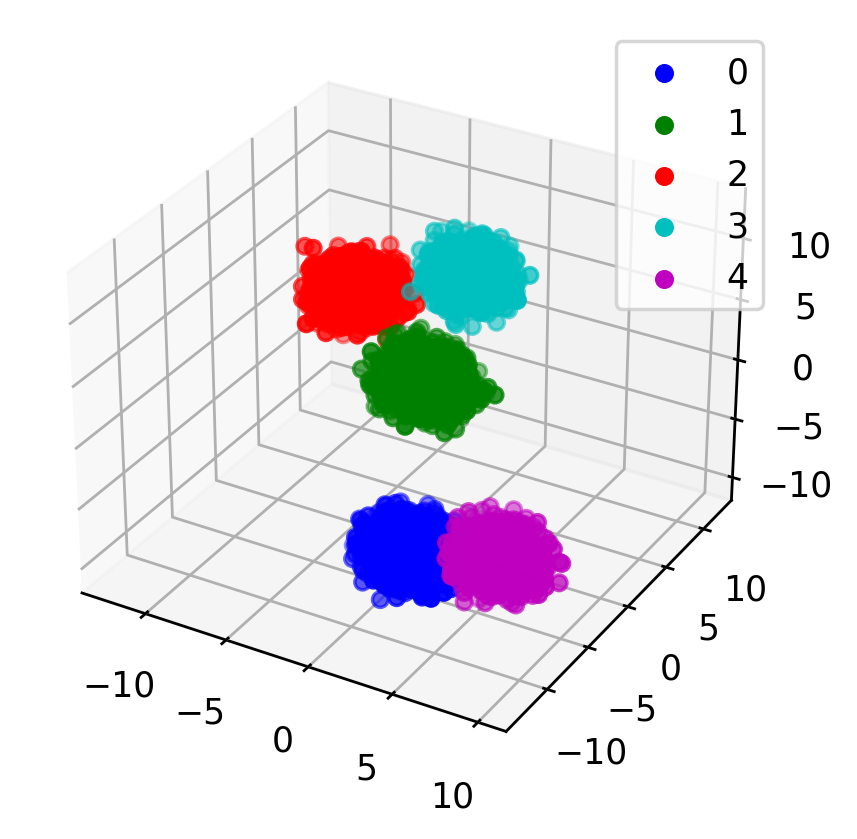

In [8]:
data_np = df.drop('label', axis=1).values

starttime=time.time()
(mu, np_iterations) = npkmeans(k, data_np, NUMBER_OF_ITERATION, THRESHOLD)
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' time: {np_stopwatch}")
print(f'\nThe centroids of the K = {k} clusters are {mu}')
print(f'\nNumber of iterations = {np_iterations}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)
fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

for i in range(k):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

4. Test the two implementations providing charts and visual representations that show, depending on the size of the vectors, the number of the vectors and the number of clusters, how the performance changes.

First of all let's run `sklearn.KMeans` to compare the output.

sklearn K-means' time: 0.06967592239379883

The centroids of the K = 5 clusters are [[1.9436979512648587, -6.912650449191893, -6.873450977271874], [-8.802262140502897, 7.313507084528763, 2.0574968600086185], [-2.4942207425946314, 8.950627260978925, 4.647828369976588], [6.623585170274563, -5.725055050571815, -6.350633573782178], [4.160632965251229, -9.578596361114018, 9.407972308887384]]

Number of iterations = 5


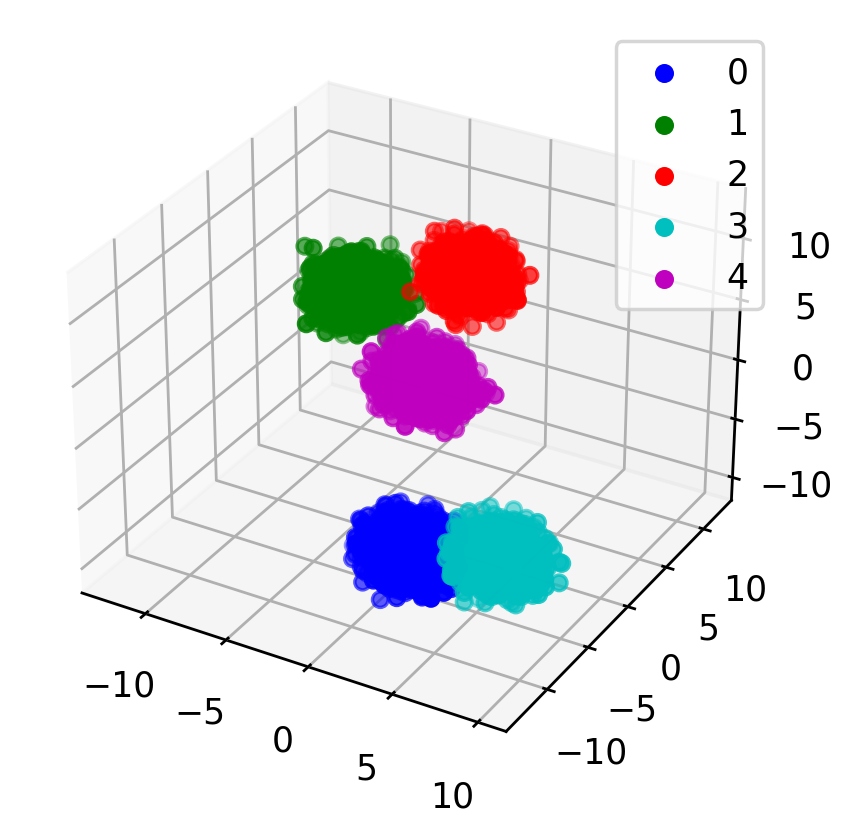

In [9]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=k, init='random', max_iter=NUMBER_OF_ITERATION, tol=THRESHOLD, random_state=42)

starttime=time.time()
y_predict = model.fit_predict(data)
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' time: {sklearn_stopwatch}")
print(f'\nThe centroids of the K = {k} clusters are {model.cluster_centers_.tolist()}')
print(f'\nNumber of iterations = {model.n_iter_}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

for i in range(k):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

Let's compare now the $3$ algorithms' computational efficiency on this dataset.

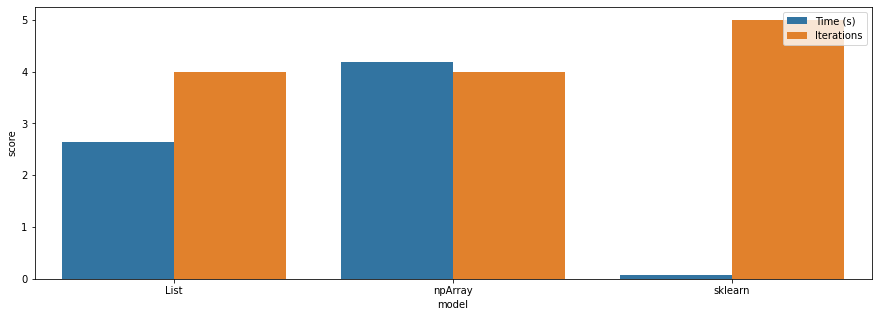

In [10]:
import seaborn as sns

hist = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch)
scores.append(np_stopwatch)
scores.append(sklearn_stopwatch)
it.append(list_iterations)
it.append(np_iterations)
it.append(model.n_iter_)
hist['model'] = ['List', 'npArray', 'sklearn'] * 2
hist['metric'] = ['Time (s)'] * len(scores) + ['Iterations'] * len(it)
hist['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=hist, hue='metric')
_ = plt.legend(loc='upper right')

As we can see from the histogram, `sklearn.KMeans` is the most efficient implementation. List implementation is faster than the one based on numpy arrays (basically the only difference is on how we compute distances, and the euclidean distance between lists seems to be more efficient).

Let's compare now the $3$ algorithms' efficiency running them $3$ times each one on a $1,000$ points test dataset.

In [11]:
data = make_blobs(n_samples=1000, n_features=3, centers=5, random_state=42)

starttime=time.time()
list_iterations = 0
for i in range(3):
    _,it = list_kmeans(k, data[0].tolist(), NUMBER_OF_ITERATION, THRESHOLD)
    list_iterations += it
list_stopwatch = time.time() - starttime
print(f"List-based K-means' mean time: {list_stopwatch/3.}")
print(f"List-based K-means' mean iterations: {list_iterations/3.}")

starttime=time.time()
np_iterations = 0
for i in range(3):
    _,it = npkmeans(k, data[0], NUMBER_OF_ITERATION, THRESHOLD)
    np_iterations += it
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' mean time: {np_stopwatch/3.}")
print(f"npArray-based K-means' mean iterations: {np_iterations/3.}")

model = KMeans(n_clusters=k, init='random',max_iter=NUMBER_OF_ITERATION,tol=THRESHOLD)
starttime=time.time()
sklearn_iterations = 0
for i in range(3):
    model.fit_predict(data[0])
    sklearn_iterations += model.n_iter_
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' mean time: {sklearn_stopwatch/3.}")
print(f"sklearn K-means' mean iterations: {sklearn_iterations/3.}")

List-based K-means' mean time: 0.6284842491149902
List-based K-means' mean iterations: 8.333333333333334
npArray-based K-means' mean time: 0.9963536262512207
npArray-based K-means' mean iterations: 10.333333333333334
sklearn K-means' mean time: 0.01963965098063151
sklearn K-means' mean iterations: 4.333333333333333


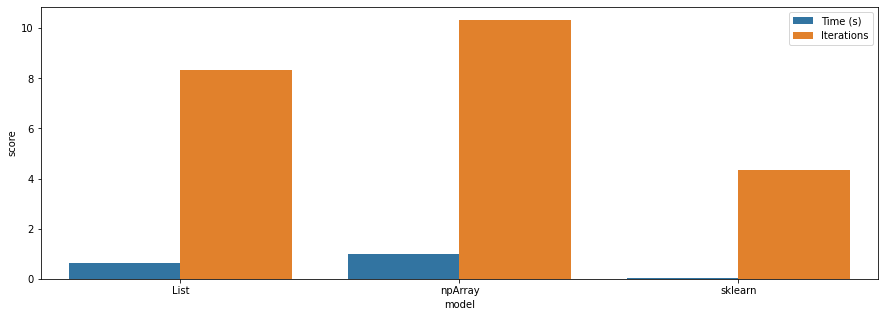

In [12]:
hist = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch/3.)
scores.append(np_stopwatch/3.)
scores.append(sklearn_stopwatch/3.)
it.append(list_iterations/3.)
it.append(np_iterations/3.)
it.append(sklearn_iterations/3.)
hist['model'] = ['List', 'npArray', 'sklearn'] * 2
hist['metric'] = ['Time (s)'] * len(scores) + ['Iterations'] * len(it)
hist['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=hist, hue='metric')
_ = plt.legend(loc='upper right')

As we can see from the histogram, `sklearn.KMeans` is again the most efficient implementation. Within this scenario (lower number of points by a factor of $10$) mean time is reduced (time is directly proportional to number of points and iterations) and numpy arrays implementation is running similar to the one based on lists.

Let's compare then the algorithms running with a wrong number of clusters (in eccess, i.e. $8$ instead of $5$).

List-based K-means' mean time: 1.5501763025919597
List-based K-means' mean iterations: 17.333333333333332


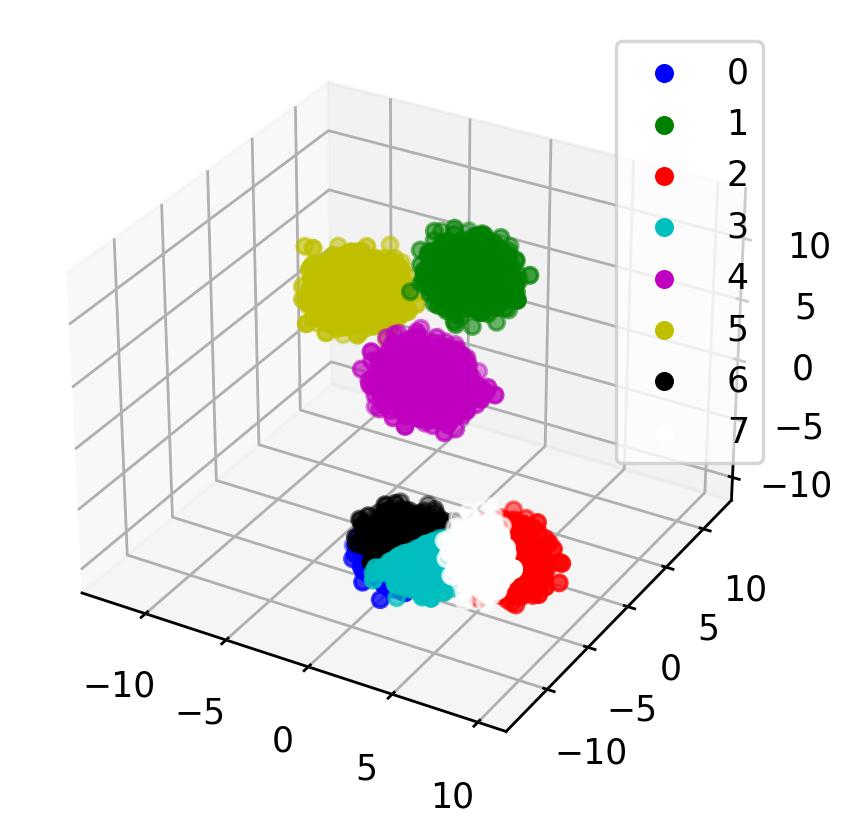

In [13]:
starttime=time.time()
list_iterations = 0
for i in range(3):   
    mu,it = list_kmeans(8, data[0].tolist(), NUMBER_OF_ITERATION, THRESHOLD)
    list_iterations += it
list_stopwatch = time.time() - starttime
print(f"List-based K-means' mean time: {list_stopwatch/3.}")
print(f"List-based K-means' mean iterations: {list_iterations/3.}")

# mu of last iteration
cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)

fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

for i in range(8):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

npArray-based K-means' mean time: 1.4285043080647786
npArray-based K-means' mean iterations: 13.0


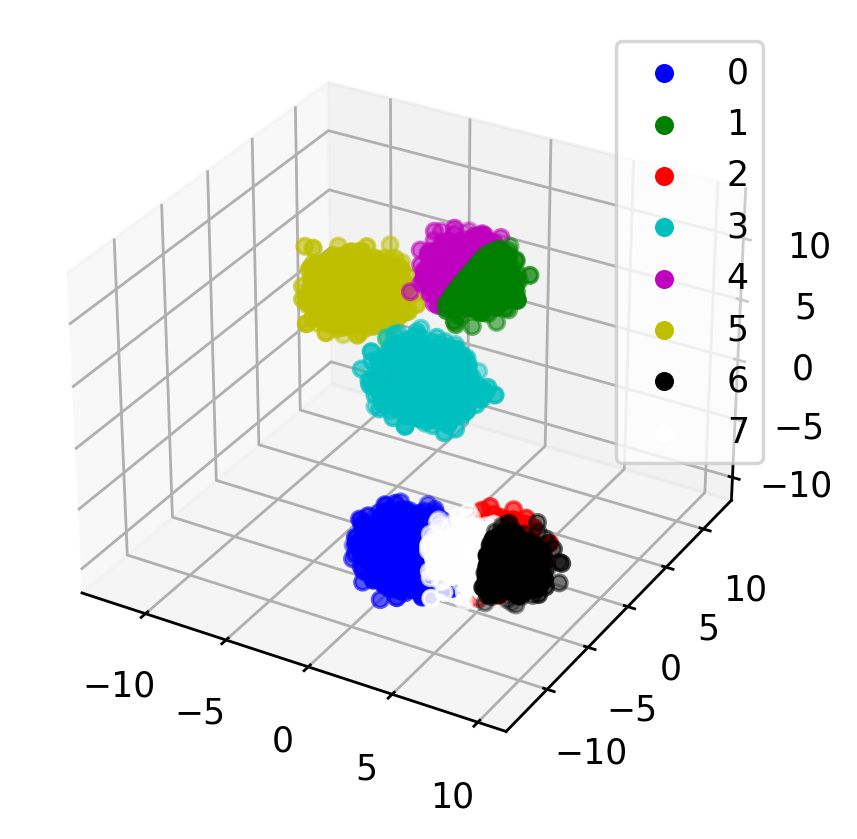

In [14]:
starttime=time.time()
np_iterations = 0
for i in range(3):   
    mu,it = npkmeans(8,data[0],NUMBER_OF_ITERATION, THRESHOLD)
    np_iterations += it
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' mean time: {np_stopwatch/3.}")
print(f"npArray-based K-means' mean iterations: {np_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)

fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

for i in range(8):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

sklearn K-means' time: 0.03240736325581869
sklearn K-means' iterations: 11.0


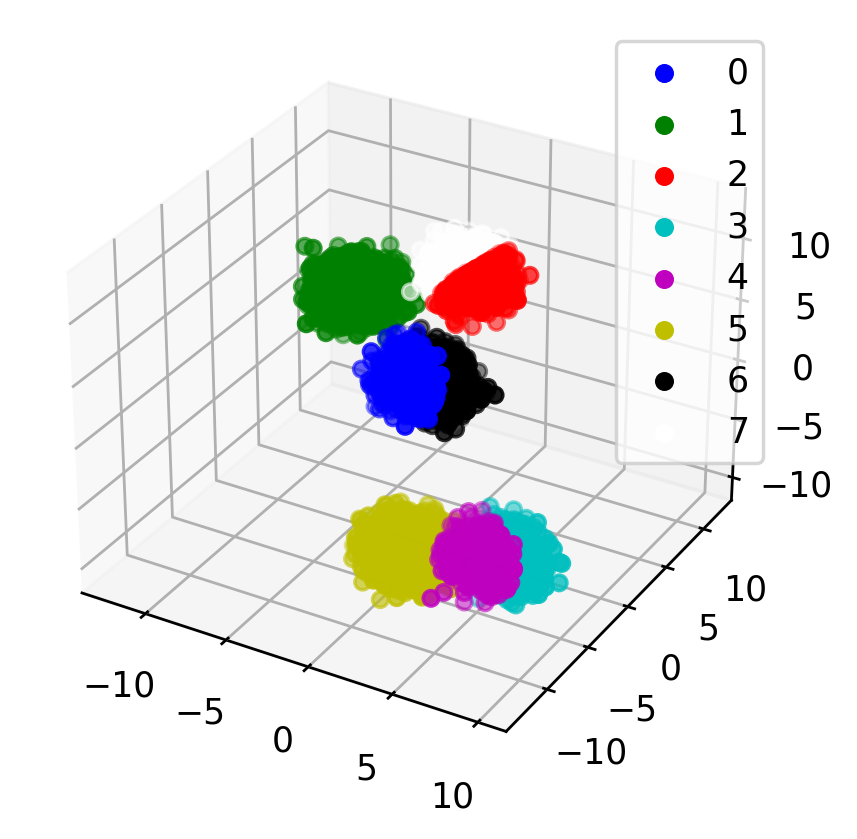

In [15]:
model = KMeans(n_clusters=8, init='random', max_iter=NUMBER_OF_ITERATION, tol=THRESHOLD)
starttime=time.time()
sklearn_iterations = 0
for i in range(3):    
    model.fit_predict(data[0])
    sklearn_iterations += model.n_iter_
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' time: {sklearn_stopwatch/3.}")
print(f"sklearn K-means' iterations: {sklearn_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

for i in range(8):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

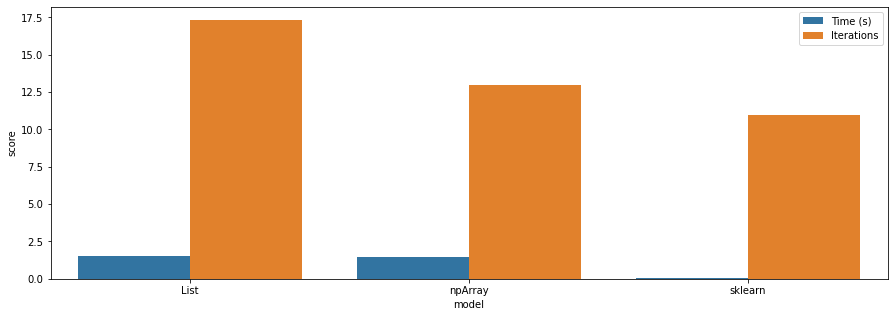

In [16]:
hist = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch/3.)
scores.append(np_stopwatch/3.)
scores.append(sklearn_stopwatch/3.)
it.append(list_iterations/3.)
it.append(np_iterations/3.)
it.append(sklearn_iterations/3.)
hist['model'] = ['List', 'npArray', 'sklearn'] * 2
hist['metric'] = ['Time (s)'] * len(scores) + ['Iterations'] * len(it)
hist['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=hist, hue='metric')
_ = plt.legend(loc='upper right')

Obviously, larger $k$ means higher amount of time, but `sklearn.KMeans` always performs best. As before, our implementations work similar.

Now we will compare the algorithms running with a wrong number of clusters (this time in defect, i.e. $3$ instead of $5$).

List-based K-means' time: 0.2142493724822998
List-based K-means' iterations: 3.3333333333333335


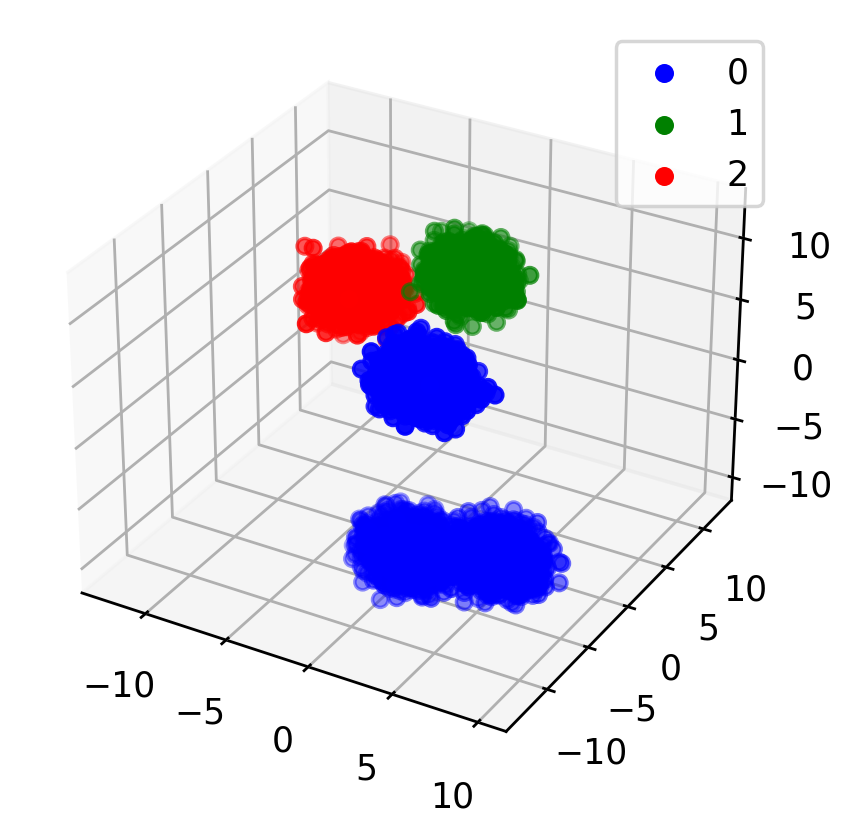

In [17]:
starttime=time.time()
list_iterations = 0
for i in range(3):   
    mu,it = list_kmeans(3, data[0].tolist(), NUMBER_OF_ITERATION, THRESHOLD)
    list_iterations += it
list_stopwatch = time.time() - starttime
print(f"List-based K-means' time: {list_stopwatch/3.}")
print(f"List-based K-means' iterations: {list_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)

fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

for i in range(3):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

npArray-based K-means' time: 0.2621946334838867
npArray-based K-means' iterations: 2.6666666666666665


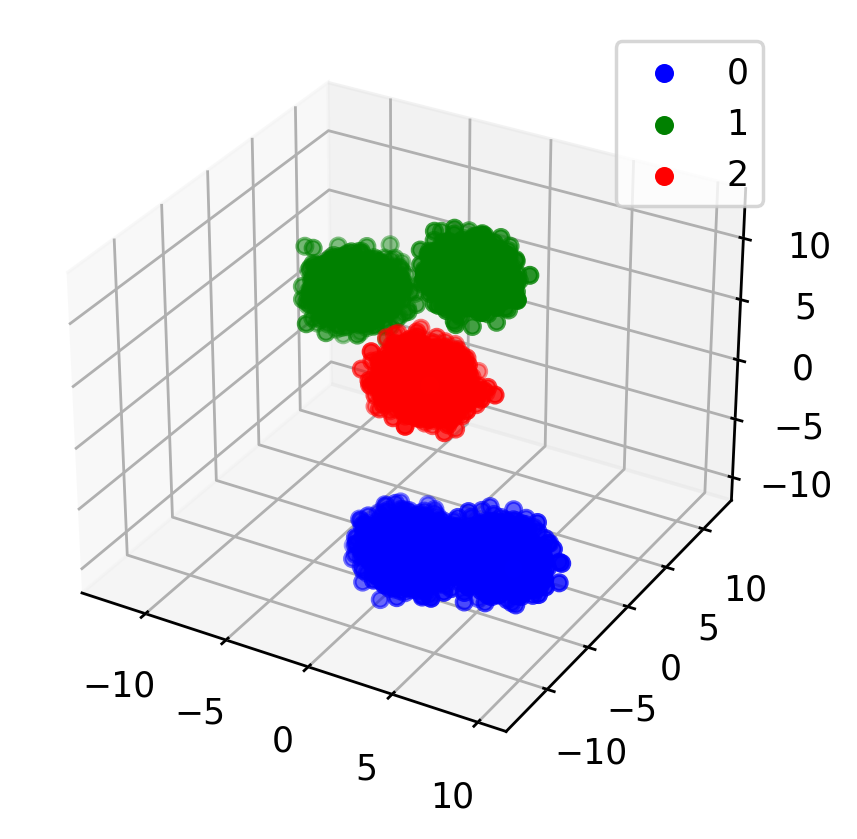

In [18]:
starttime=time.time()
np_iterations = 0
for i in range(3): 
    mu,it = npkmeans(3, data[0], NUMBER_OF_ITERATION, THRESHOLD)
    np_iterations += it
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' time: {np_stopwatch/3.}")
print(f"npArray-based K-means' iterations: {np_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)

fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

for i in range(3):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

sklearn K-means' time: 0.013494729995727539
sklearn K-means' iterations: 3.0


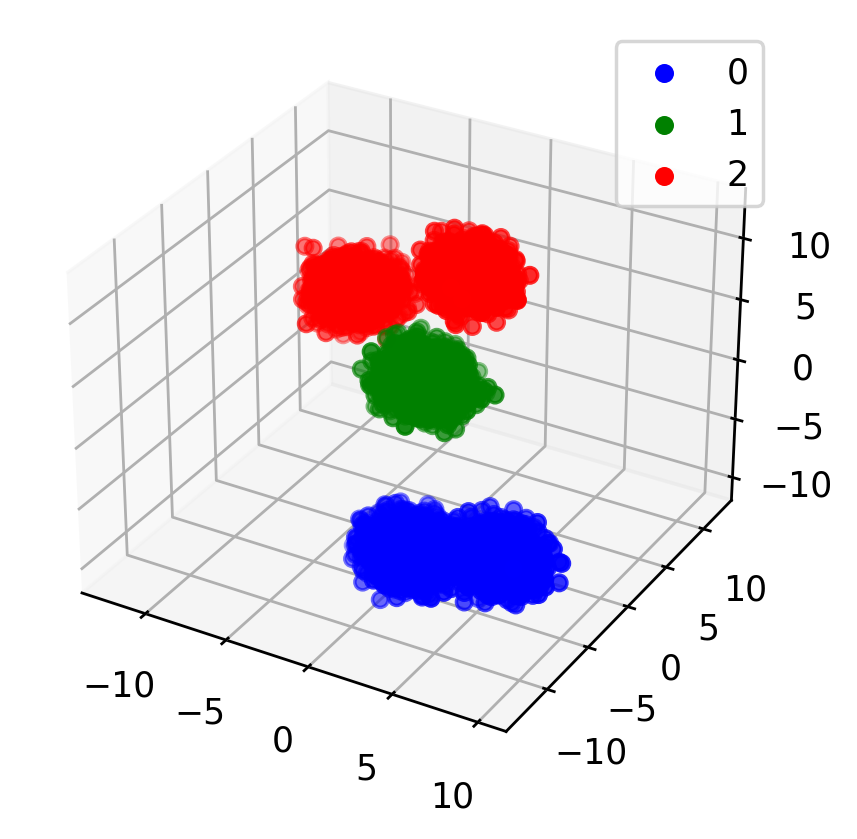

In [19]:
model = KMeans(n_clusters=3, init='random', max_iter=NUMBER_OF_ITERATION, tol=THRESHOLD)
starttime=time.time()
sklearn_iterations = 0
for i in range(3):    
    model.fit_predict(data[0])
    sklearn_iterations += model.n_iter_
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' time: {sklearn_stopwatch/3.}")
print(f"sklearn K-means' iterations: {sklearn_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

for i in range(3):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

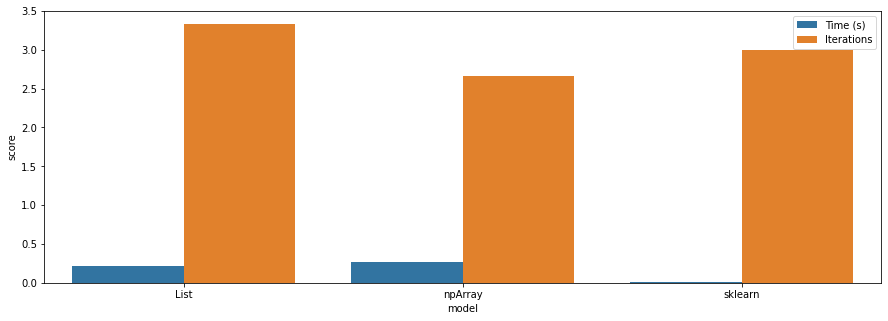

In [20]:
hist = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch/3.)
scores.append(np_stopwatch/3.)
scores.append(sklearn_stopwatch/3.)
it.append(list_iterations/3.)
it.append(np_iterations/3.)
it.append(sklearn_iterations/3.)
hist['model'] = ['List', 'npArray', 'sklearn'] * 2
hist['metric'] = ['Time (s)'] * len(scores) + ['Iterations'] * len(it)
hist['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=hist, hue='metric')
_ = plt.legend(loc='upper right')

Lower number  of $k$ means less time for every implementation with `sklearn.KMeans` always performing best. This time list based implementation performs fine with little lower mean number of iterations (and as a consequence lower time) with respect to numpy arrays based implementation.

Last section for this project: we input vectors in 6 dimensions to see if and how cluster change (K-means has problems in high-dimensionality spaces).

In [21]:
# Test dataset: 10,000 samples/rows, 6 dimensions, 4 "real" clusters
data = make_blobs(n_samples=10000, n_features=6, centers=4, random_state=42)
k = 4

df = pd.DataFrame(data[0])
df.columns = ["x","y","z","w","q","t"]
df['label'] = data[1]
df

,x,y,z,w,q,t,label
0,-9.334442,7.407545,1.937863,3.508715,-10.141933,9.031824,1
1,-2.020067,9.069457,4.639270,3.169797,-5.363511,-8.387663,0
2,-2.298073,8.596037,4.290180,1.998842,-6.630035,-7.027281,0
3,-7.261870,7.818028,1.745420,4.270799,-8.685022,9.584158,1
4,-9.662395,9.178787,3.392702,5.728647,-10.238609,7.789796,1
...,...,...,...,...,...,...,...
9995,-1.858471,-2.491138,1.688937,-6.746819,-4.976070,-2.671104,3
9996,-0.869241,8.510929,5.173505,0.518608,-7.070152,-6.588735,0
9997,-4.388665,7.217294,4.801965,2.835560,-8.497249,-6.430397,0
9998,-10.669979,6.422420,1.886204,3.963922,-10.137855,9.317209,1


PCA technique helps us visualizing the dataset under analysis in 2D.

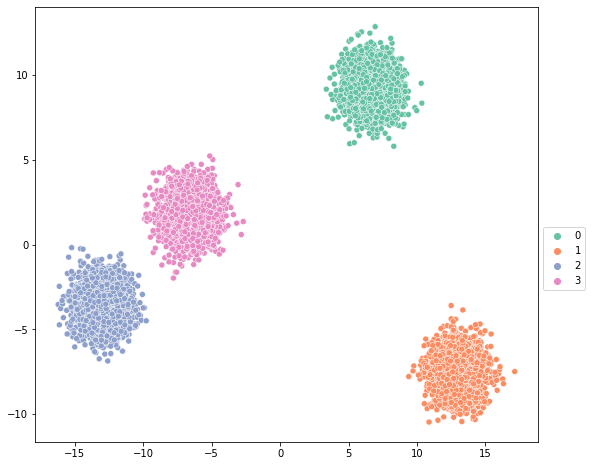

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(data[0])
fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=df['label'],palette="Set2");
plt.legend(loc=(1.01,0.35));

List-based K-means' time: 2.350151777267456

The centroids of the K = 4 clusters are [array([-8.84299975,  7.31537218,  2.03897602,  4.16893402, -9.60352316,
        9.38070726]), array([-2.50656526,  8.99561832,  4.63543647,  1.97481911, -6.86286234,
       -6.86361612]), array([ 6.68368994, -5.77123142, -6.35404357, -6.31708326, -3.93564167,
        0.48491996]), array([-1.33234536, -4.20381918,  2.22740499, -7.22401671, -4.14697816,
       -2.66378701])]

Number of iterations = 3


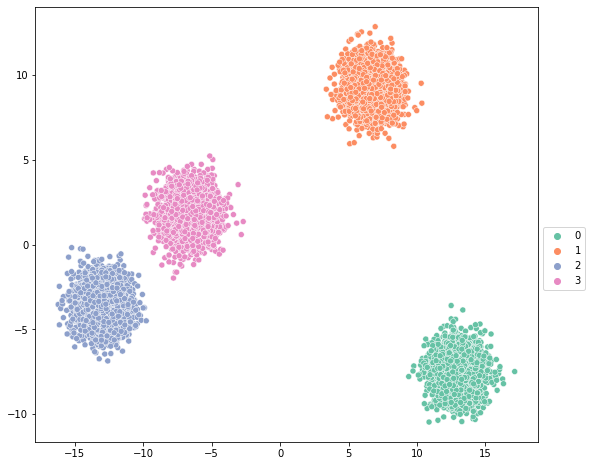

In [28]:
data = df.drop('label', axis=1).values.tolist()

starttime=time.time()
(mu,it) = list_kmeans(k, data, NUMBER_OF_ITERATION, THRESHOLD)
list_stopwatch = time.time() - starttime

print(f"List-based K-means' time: {list_stopwatch}")
print(f'\nThe centroids of the K = {k} clusters are {mu}')
print(f'\nNumber of iterations = {it}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z,df.w,df.q,df.t],mu),axis=1)

fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=cluster,palette="Set2");
plt.legend(loc=(1.01,0.35));

List-based K-means' time: 3.5169708728790283

The centroids of the K = 4 clusters are [array([-8.84299975,  7.31537218,  2.03897602,  4.16893402, -9.60352316,
        9.38070726]), array([-2.50656526,  8.99561832,  4.63543647,  1.97481911, -6.86286234,
       -6.86361612]), array([ 6.68368994, -5.77123142, -6.35404357, -6.31708326, -3.93564167,
        0.48491996]), array([-1.33234536, -4.20381918,  2.22740499, -7.22401671, -4.14697816,
       -2.66378701])]

Number of iterations = 3


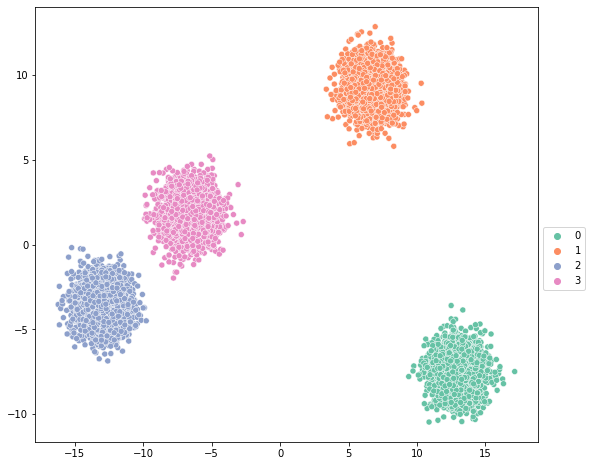

In [26]:
data = df.drop('label', axis=1).values

starttime=time.time()
(mu,it) = npkmeans(k, data, NUMBER_OF_ITERATION, THRESHOLD)
list_stopwatch = time.time() - starttime

print(f"List-based K-means' time: {list_stopwatch}")
print(f'\nThe centroids of the K = {k} clusters are {mu}')
print(f'\nNumber of iterations = {it}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z,df.w,df.q,df.t],mu),axis=1)

fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=cluster,palette="Set2");
plt.legend(loc=(1.01,0.35));

List-based K-means' time: 0.07580327987670898

The centroids of the K = 4 clusters are [[-1.3323453595166685, -4.203819177883938, 2.2274049856273637, -7.2240167128834045, -4.146978161590768, -2.663787013846473], [-8.842999753707208, 7.315372181406798, 2.038976015292989, 4.168934021214527, -9.60352315659329, 9.380707261254132], [6.683689944153777, -5.771231417209975, -6.354043565471446, -6.317083260056057, -3.9356416678453807, 0.48491995742436955], [-2.506565257865499, 8.99561832272115, 4.63543646788749, 1.9748191062560199, -6.86286233740955, -6.8636161188175]]

Number of iterations = 8


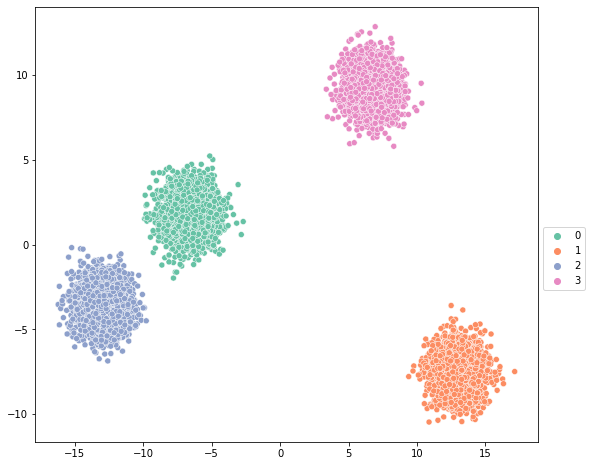

In [25]:
starttime=time.time()
model = KMeans(n_clusters=k,init='random',max_iter=NUMBER_OF_ITERATION,tol=THRESHOLD,random_state=42)
y_predict = model.fit_predict(data)
list_stopwatch = time.time() - starttime

print(f"List-based K-means' time: {list_stopwatch}")
print(f'\nThe centroids of the K = {k} clusters are {model.cluster_centers_.tolist()}')
print(f'\nNumber of iterations = {model.n_iter_}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z,df.w,df.q,df.t],model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=cluster,palette="Set2");
plt.legend(loc=(1.01,0.35));

In conclusion, we can see that `sklearn.KMeans`, beside guaranteering a correct partitioning (K-means strongly depends on vectors' initialization\*, i.e., change initialization does not guarantee the same solution because it’s a greedy algorithm), is more efficient and that the one based on lists is faster than the one based on numpy arrays (this last one mentioned also suffers a lot highly-dimensional vectors). A further update for this project could be improving the initialization selecting initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia (like *kmeans++* method/*init* option present in `sklearn.KMeans`).

\* Other K-means' issues are encountered with clusters of different size, clusters of different number of samples, clusters of same size and same density but not well separated and clusters of same density but of different shape.